<a href="https://colab.research.google.com/github/data-better/ASL/blob/master/MNIST_convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST 데이터에 대해 CNN 모형 작성
 * Deeplearing with Python,  케라스 창시자에게 배우는 딥러닝 참조

### MNIST 데이터 불러오기

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


### CNN 모형 작성

#### Convolution 부분

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

W0721 05:14:11.654867 140302607521664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 05:14:11.691972 140302607521664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 05:14:11.700124 140302607521664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 05:14:11.725014 140302607521664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### FC 부분

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

### CNN 모형의 훈련

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=20, batch_size=128)

Epoch 1/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0036 - acc: 0.9989
Epoch 2/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0029 - acc: 0.9992
Epoch 3/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0028 - acc: 0.9990
Epoch 4/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0019 - acc: 0.9995
Epoch 5/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0031 - acc: 0.9990
Epoch 6/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0020 - acc: 0.9993
Epoch 7/20
60000/60000 [==============================] - 3s 43us/step - loss: 8.9579e-04 - acc: 0.9998
Epoch 8/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0034 - acc: 0.9992
Epoch 9/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0045 - acc: 0.9985
Epoch 10/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0016 - acc: 0.

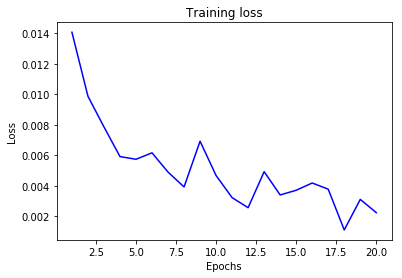

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
#val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='training loss')
#plt.plot(epochs, val_loss, 'bo', label='validation loss')
plt.title("Training loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.legend()

plt.show()

### CNN 모형의 평가

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 79us/step


In [0]:
test_acc

0.9928

In [0]:
prediction=model.predict(test_images)

In [0]:
import numpy as np
np.set_printoptions(precision=2)
print(prediction[1,])
print(test_labels[1])

[3.50e-08 1.26e-06 1.00e+00 1.09e-09 2.54e-08 3.77e-11 2.39e-09 6.08e-10
 5.93e-09 5.94e-12]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
